In [17]:
import pandas as pd
import numpy as np
import plotnine as plt9
from plotnine import *

In [18]:
df_00 = pd.read_csv("dataset/13100834.csv")
df_0 = df_00.drop(columns=['SYMBOL', 'TERMINATED'])
df_1 = df_0.loc[df_00['Statistics'] == "Percentage of persons"]
df_2 = df_1.loc[df_00['Household food security status'] == "Food insecure"]
df_3 = df_2.dropna(subset=['VALUE'])
cl_df = df_3[['GEO', 'REF_DATE','Household food security status', 'VALUE' ]]
cl_CA_df = cl_df.loc[cl_df['GEO'] == "Canada"]
cl_CA_df_2 = cl_CA_df.groupby(cl_CA_df['REF_DATE'])["VALUE"].mean()

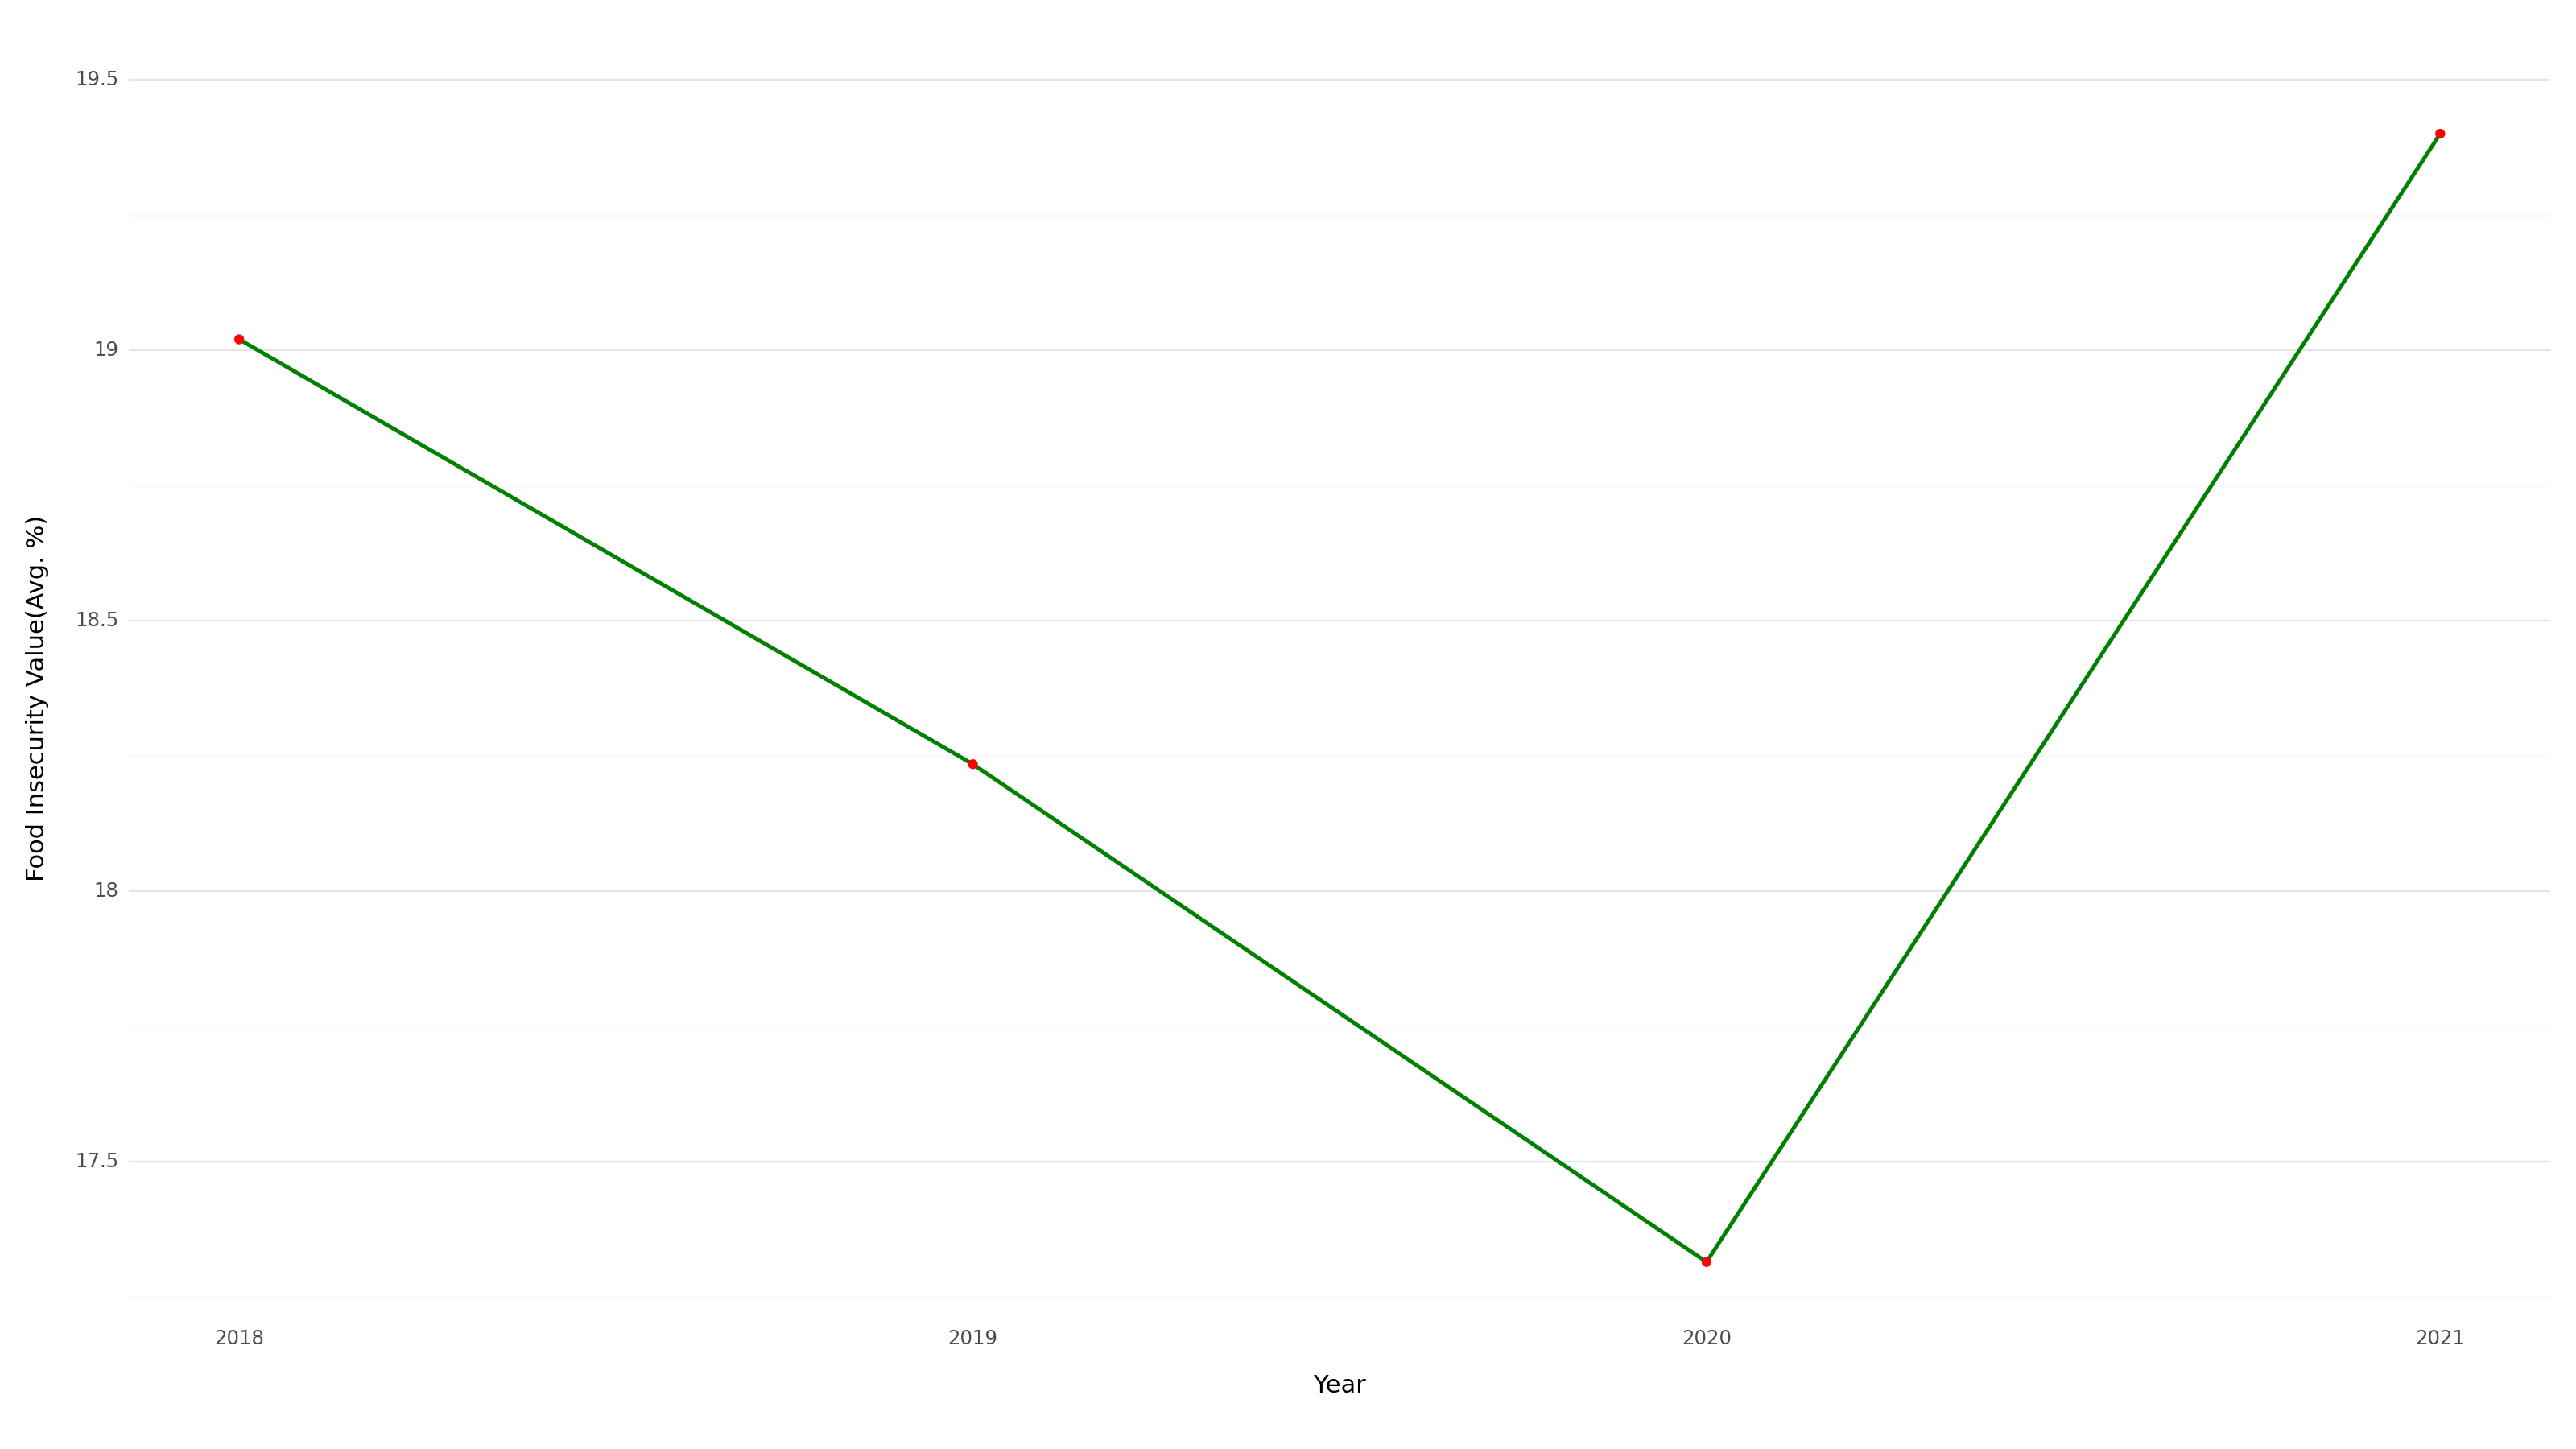

In [19]:
cl_CA_df = cl_df.loc[cl_df['GEO'] == "Canada"]
cl_CA_df_2 = cl_CA_df.groupby(cl_CA_df['REF_DATE'])["VALUE"].mean()
years = cl_CA_df['REF_DATE'].unique()
np_arrray = np.asarray(cl_CA_df_2)
df_CA = pd.DataFrame(years, np_arrray)
plot = (
      plt9.ggplot(df_CA, mapping = plt9.aes(x = years, y=np_arrray)) +
      plt9.theme_minimal() +
      plt9.geom_line(linetype = "solid", size=1, color='green')+
      plt9.geom_point(color='red')+
      plt9.theme(figure_size=(16, 9))+
      plt9.labs(x = "Year", y = "Food Insecurity Value(Avg. %)") +
      #plt9.themes.element_text(family=, size = 1.5)+
      # plt9.theme(axis_line=element_line(size=.7, color=gray)) +
      plt9.theme(panel_grid_major_x = plt9.element_blank(), 
                 panel_grid_minor_x = plt9.element_blank())
  )
plot.draw()
# plot.save("food_insecurity_canada.jpeg")

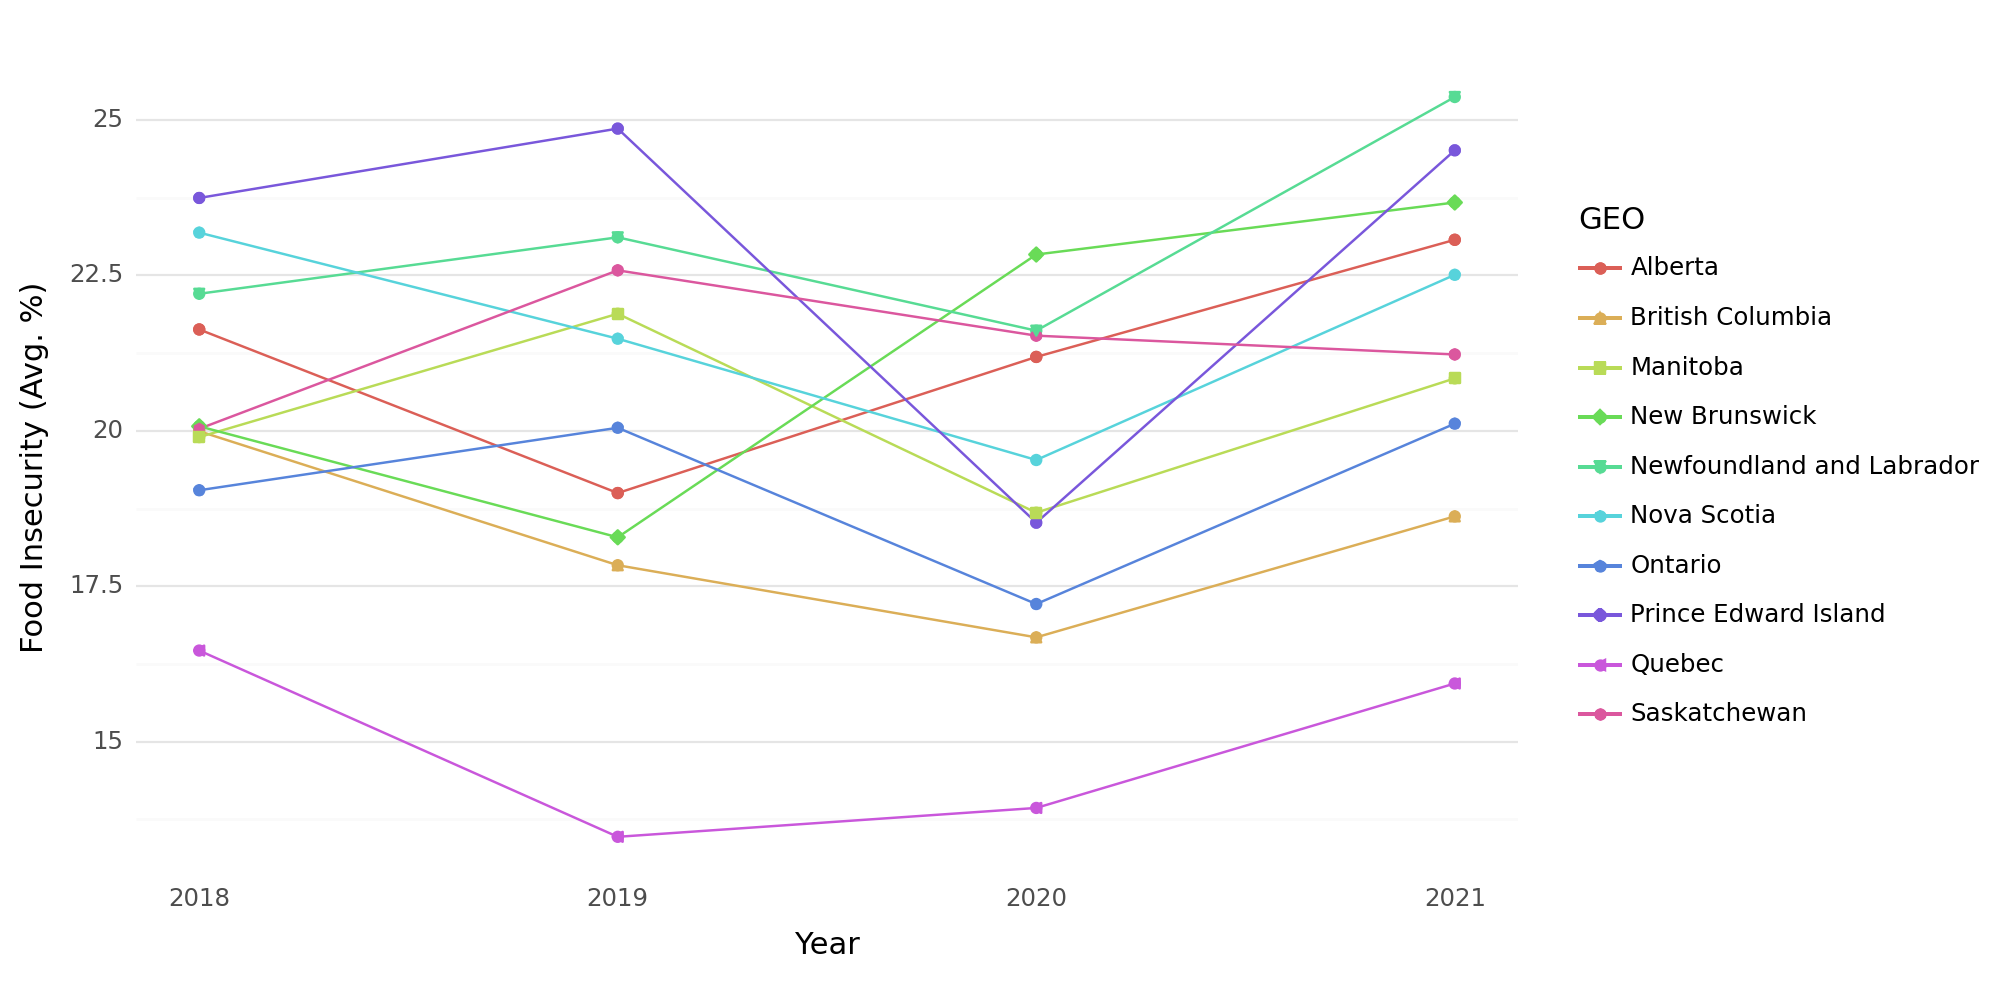

In [20]:
ref_dates = cl_df['REF_DATE'].unique()
geos = ["Nova Scotia", "New Brunswick", "Quebec", "Ontario", "Manitoba", 
        "Saskatchewan", "Alberta", "Newfoundland and Labrador", 
        "Prince Edward Island", "British Columbia"]
my_array = []
for ref_date in ref_dates:
    for geo in geos:
        cl_NSc_df = cl_df[(cl_df.GEO == geo) & (cl_df.REF_DATE== ref_date)]
        mean_rslt = cl_NSc_df["VALUE"].mean()
        my_array.append([geo, ref_date, mean_rslt])
df = pd.DataFrame(my_array, columns = ['GEO','REF_DATE','VALUE'])
plot = (
      plt9.ggplot(df, mapping = plt9.aes(x = 'REF_DATE', y='VALUE', color='GEO', group=df['GEO'])) +
      plt9.theme_minimal() +
      plt9.geom_line(linetype = "solid")+
      plt9.geom_point()+
      plt9.theme(figure_size=(10, 5))+
      plt9.labs(x = "Year", y = "Food Insecurity (Avg. %)")+
      # title="Figure 2: Food-Insecurity Status over the Provinces") +
      plt9.geom_point(aes(shape=df['GEO']))  +
      plt9.theme(panel_grid_major_x = plt9.element_blank(), 
                 panel_grid_minor_x = plt9.element_blank())
  )
plot.draw()
# plot.save("food_insecurity_provinces.jpeg")